In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
cols = np.load('../Data/Final/ClashOfClans_cols.npy', allow_pickle=True)
arr = np.load('../Data/Final/ClashOfClans.npy', allow_pickle=True)
df = pd.DataFrame(arr, columns=cols)
df = df[['post_id', 'time', 'post_text', 
            'images_description', 'shares', 'comments',
                'comments_full', 'reaction_count',
                'reactions', 'reactors']]
df[['shares', 'comments', 'reaction_count']] = df[['shares', 'comments', 'reaction_count']].astype(int)

In [4]:
df.columns

Index(['post_id', 'time', 'post_text', 'images_description', 'shares',
       'comments', 'comments_full', 'reaction_count', 'reactions', 'reactors'],
      dtype='object')

In [5]:
reactions = pd.DataFrame(df[['post_id', 'time', 'reaction_count', 'reactions', 'reactors']])

In [6]:
reactions['like'] = reactions['reactions'].map(lambda x: x['like'])
reactions['haha'] = reactions['reactions'].map(lambda x: x['haha'])
reactions['love'] = reactions['reactions'].map(lambda x: x['love'])
reactions['wow'] = reactions['reactions'].map(lambda x: x['wow'])
reactions['sad'] = reactions['reactions'].map(lambda x: x['sad'])
reactions['angry'] = reactions['reactions'].map(lambda x: x['angry'])
reactions['care'] = reactions['reactions'].map(lambda x: x['care'])

In [7]:
reactions[['like', 'love', 'wow', 'haha', 'care', 'angry', 'sad']].describe()

,like,love,wow,haha,care,angry,sad
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,4907.514970,1382.167665,113.341317,91.071856,83.808383,17.526946,12.970060
std,15936.195342,2819.438079,477.783913,286.438466,274.421142,39.996508,46.737208
min,277.000000,56.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1947.000000,466.500000,10.000000,12.500000,26.500000,4.000000,2.000000
50%,3258.000000,780.000000,15.000000,23.000000,45.000000,7.000000,4.000000
75%,4691.500000,1476.500000,32.500000,41.500000,85.000000,17.000000,10.500000
max,206958.000000,33290.000000,4240.000000,3085.000000,3495.000000,430.000000,528.000000


In [8]:
reactions['like']

0      1470
1      2790
2      2520
3      5406
4      4458
       ... 
162    4326
163    4587
164    5063
165    4950
166    7057
Name: like, Length: 167, dtype: int64

Text(0.5, 0.98, 'Biểu đồ thể hiện sự biến động về số lượng của từng loại cảm xúc theo thời gian')

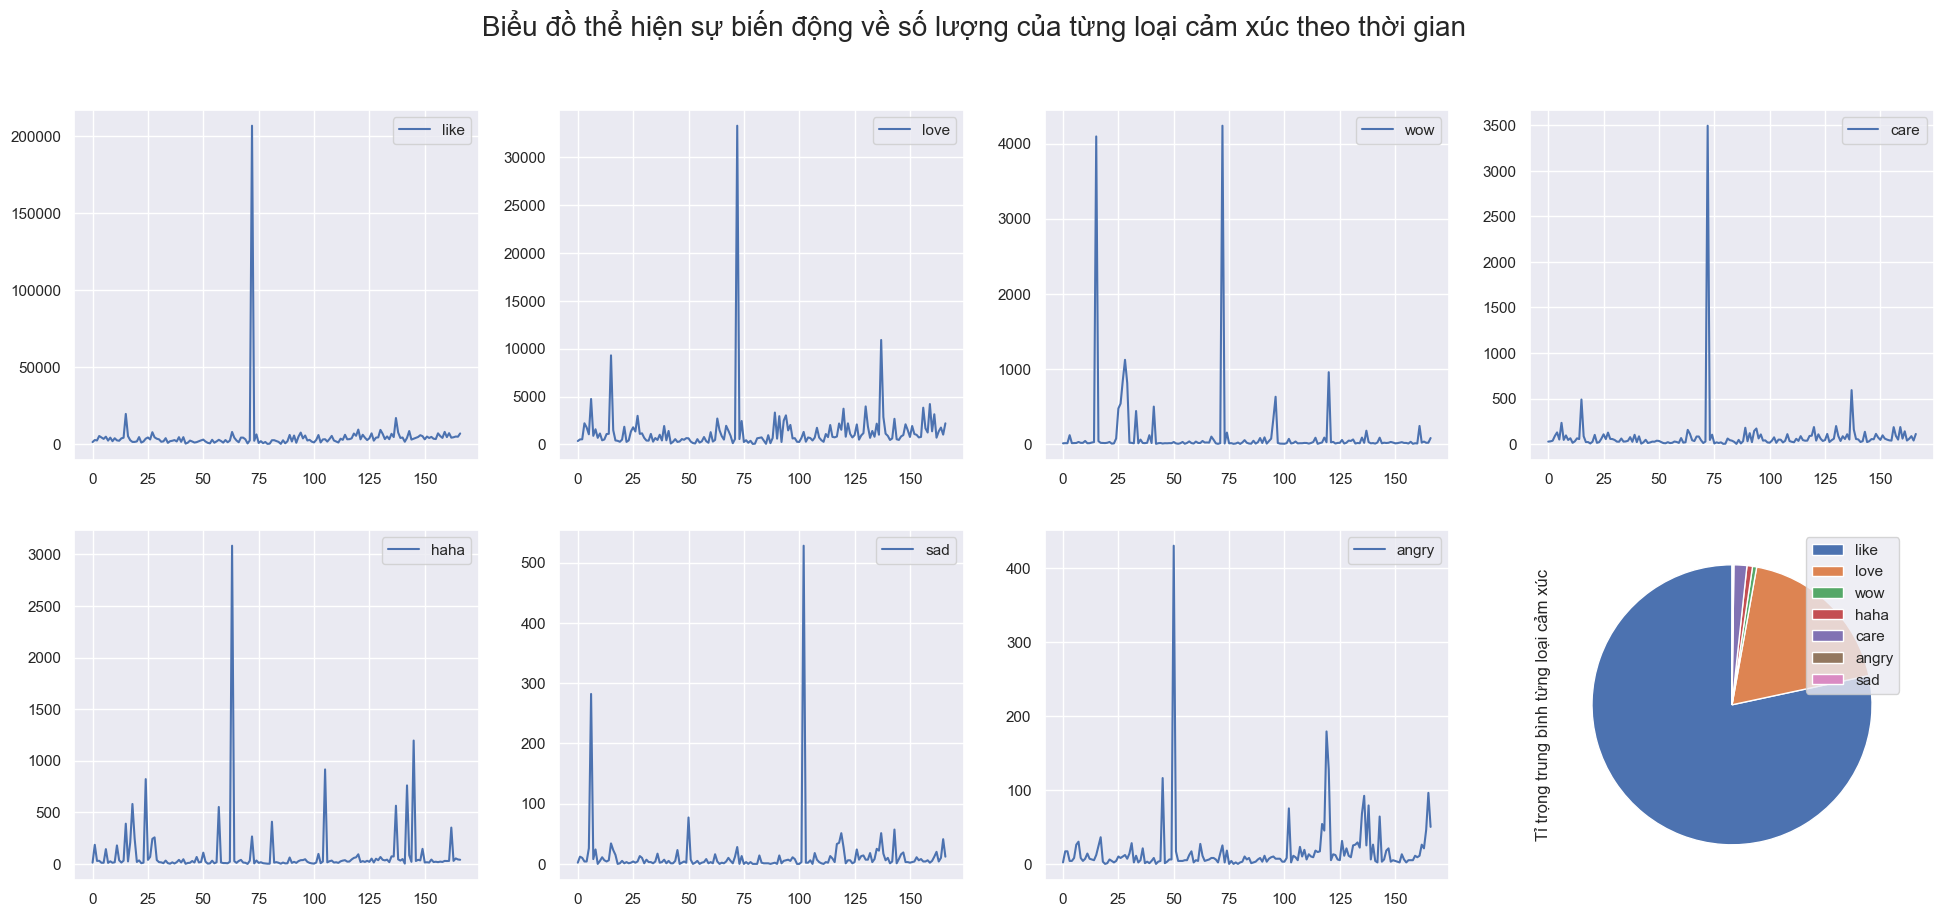

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))

sns.lineplot(reactions['like'], ax=axs[0, 0], label='like')
sns.lineplot(reactions['love'], ax=axs[0, 1], label='love')
sns.lineplot(reactions['wow'], ax=axs[0, 2], label='wow')
sns.lineplot(reactions['haha'], ax=axs[1, 0], label='haha')
sns.lineplot(reactions['care'], ax=axs[0, 3], label='care')
sns.lineplot(reactions['angry'], ax=axs[1, 2], label='angry')
sns.lineplot(reactions['sad'], ax=axs[1, 1], label='sad')
counter = [
    reactions['like'].iloc[:1].mean(),
    reactions['love'].iloc[:1].mean(),
    reactions['wow'].iloc[:1].mean(),
    reactions['haha'].iloc[:1].mean(),
    reactions['care'].iloc[:1].mean(),
    reactions['angry'].iloc[:1].mean(),
    reactions['sad'].iloc[:1].mean()
]
df_counter = pd.DataFrame(counter, columns=['Tỉ trọng trung bình từng loại cảm xúc'], index=['like', 'love', 'wow', 'haha', 'care', 'angry', 'sad'])
df_counter.plot.pie(y='Tỉ trọng trung bình từng loại cảm xúc', labels=['','','','','','',''], startangle=90, ax=axs[1, 3])
plt.legend(loc='upper right', labels=['like', 'love', 'wow', 'haha', 'care', 'angry', 'sad'])

axs[0, 0].set_ylabel('')
# axs[0, 0].grid(True)
axs[0, 1].set_ylabel('')
# axs[0, 1].grid(True)
axs[0, 2].set_ylabel('')    
# axs[0, 2].grid(True)
axs[0, 3].set_ylabel('')
# axs[0, 3].grid(True)
axs[1, 0].set_ylabel('')
# axs[1, 0].grid(True)
axs[1, 1].set_ylabel('')
# axs[1, 1].grid(True)
axs[1, 2].set_ylabel('')
# axs[1, 2].grid(True)

plt.suptitle('Biểu đồ thể hiện sự biến động về số lượng của từng loại cảm xúc theo thời gian', fontsize=20)

## Check high peaks

In [10]:
reactions.loc[reactions['like'] > 20000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [11]:
reactions.loc[reactions['love'] > 20000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [12]:
reactions.loc[reactions['wow'] > 4000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
15,882200249928502,2023-10-23 22:00:07,34074,"{'like': 19748, 'love': 9303, 'haha': 390, 'wo...","[{'name': 'Noorullah Ramazani', 'link': 'https...",19748,390,9303,4097,34,12,490
72,849314546550406,2023-08-23 23:48:43,248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495


In [13]:
reactions.loc[reactions['sad'] > 200]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
6,887129712768889,2023-11-01 22:32:35,10423,"{'like': 4978, 'love': 4747, 'haha': 143, 'wow...","[{'name': 'LogicLoom Luminary', 'link': 'https...",4978,143,4747,13,282,26,234
102,832161388265722,2023-07-21 18:59:00,8177,"{'like': 6027, 'love': 1307, 'haha': 97, 'wow'...","[{'name': 'きえ フラン', 'link': 'https://facebook....",6027,97,1307,68,528,75,75


In [14]:
reactions.loc[reactions['angry'] > 150]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
50,864489661699561,2023-09-21 19:12:21,4375,"{'like': 3057, 'love': 641, 'haha': 109, 'wow'...","[{'name': 'Di Mo', 'link': 'https://facebook.c...",3057,109,641,26,77,430,35
119,6804789822878616,2023-05-16 14:41:30,7490,"{'like': 5550, 'love': 1530, 'haha': 64, 'wow'...","[{'name': 'Halil İbrahim Yaşar', 'link': 'http...",5550,64,1530,23,51,179,93


In [15]:
reactions.loc[reactions['haha'] > 3000]

,post_id,time,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
63,855786275903233,2023-09-05 19:10:54,14024,"{'like': 8023, 'love': 2704, 'haha': 3085, 'wo...","[{'name': 'Ke Shara', 'link': 'https://faceboo...",8023,3085,2704,40,4,11,157


## >>>

In [16]:
reactions.drop(index=72, axis=0, inplace=True)

In [17]:
import lib.SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec

Text(0.5, 0.98, 'Biểu đồ thể hiện phân bố theo số lượng của từng loại cảm xúc')

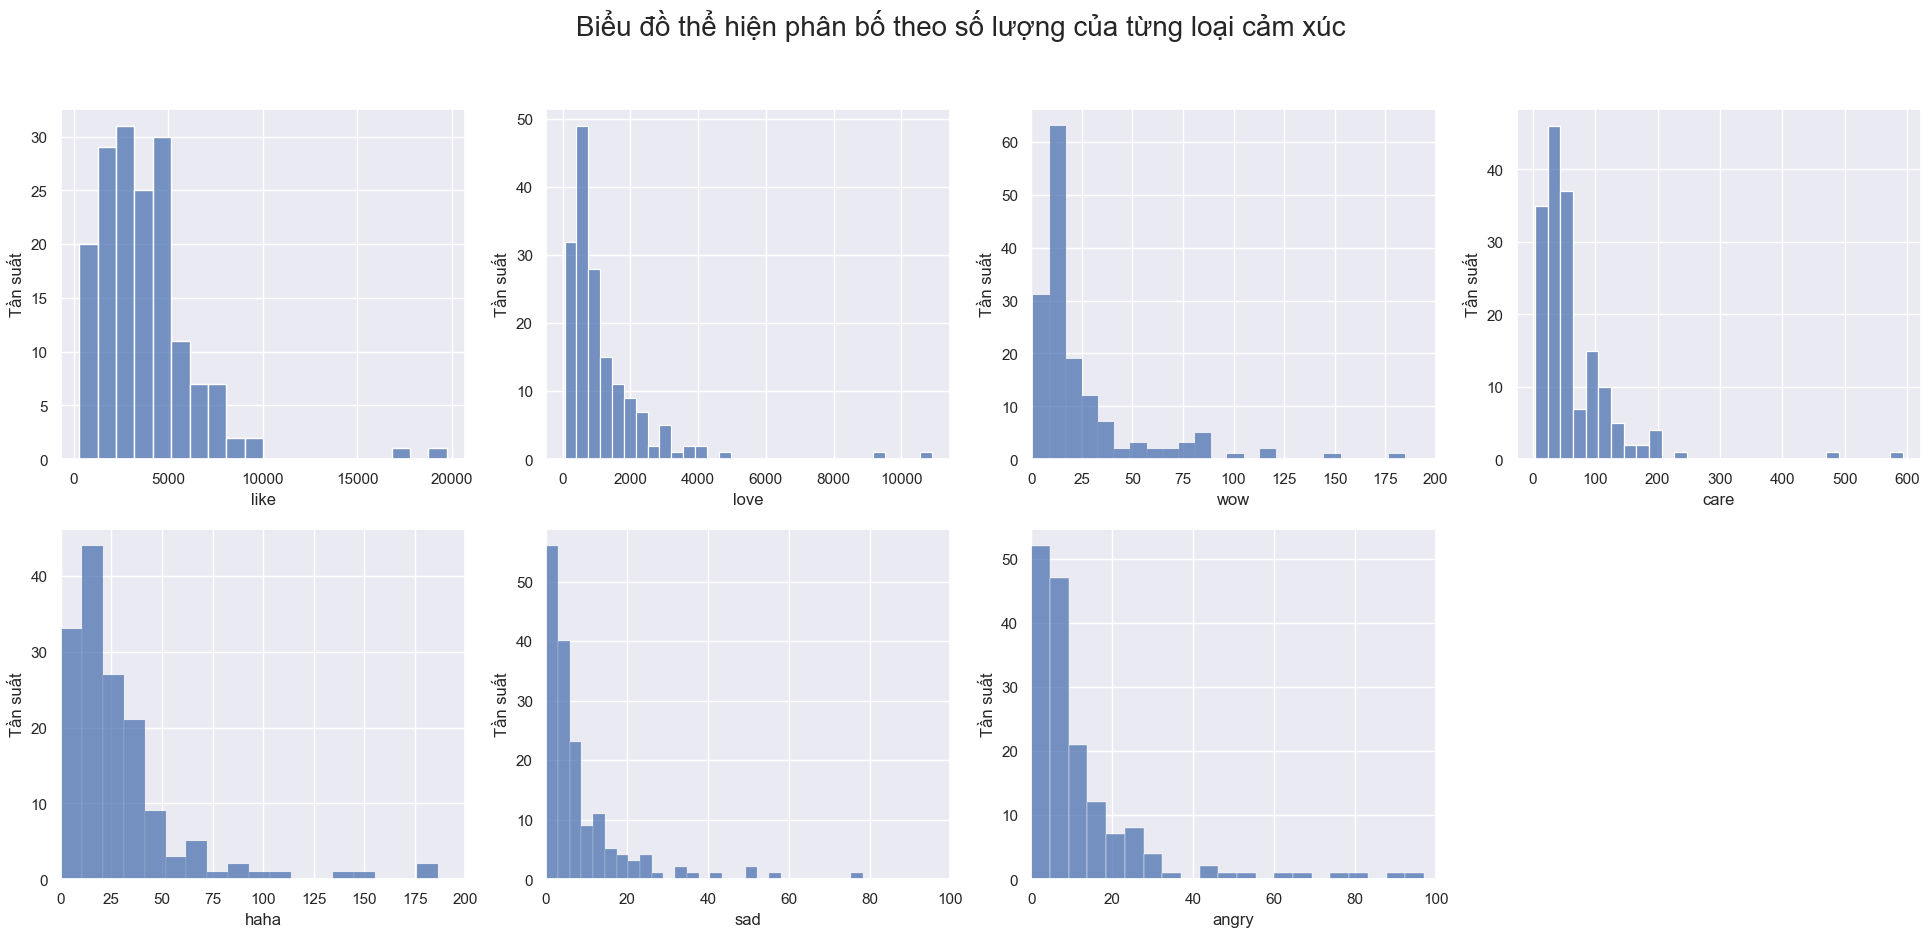

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))

sns.histplot(reactions['like'], ax=axs[0, 0], label='like')
sns.histplot(reactions['love'], ax=axs[0, 1], label='love')
sns.histplot(reactions['wow'], ax=axs[0, 2], label='wow')
sns.histplot(reactions['haha'], ax=axs[1, 0], label='haha')
sns.histplot(reactions['care'], ax=axs[0, 3], label='care')
sns.histplot(reactions['angry'], ax=axs[1, 2], label='angry')
sns.histplot(reactions['sad'], ax=axs[1, 1], label='sad')
axs[1, 3].set_visible(False)

axs[0, 0].set_ylabel('Tần suất')
# axs[0, 0].grid(True)
axs[0, 1].set_ylabel('Tần suất')
# axs[0, 1].grid(True)
axs[0, 2].set_ylabel('Tần suất')  
axs[0, 2].set_xlim(0, 200)
# axs[0, 2].grid(True)
axs[0, 3].set_ylabel('Tần suất')
# axs[0, 3].grid(True)
axs[1, 0].set_ylabel('Tần suất')  
axs[1, 0].set_xlim(0, 200)
# axs[1, 0].grid(True)
axs[1, 1].set_ylabel('Tần suất')  
axs[1, 1].set_xlim(0, 100)
# axs[1, 1].grid(True)
axs[1, 2].set_ylabel('Tần suất')  
axs[1, 2].set_xlim(0, 100)
# axs[1, 2].grid(True)

plt.suptitle('Biểu đồ thể hiện phân bố theo số lượng của từng loại cảm xúc', fontsize=20)

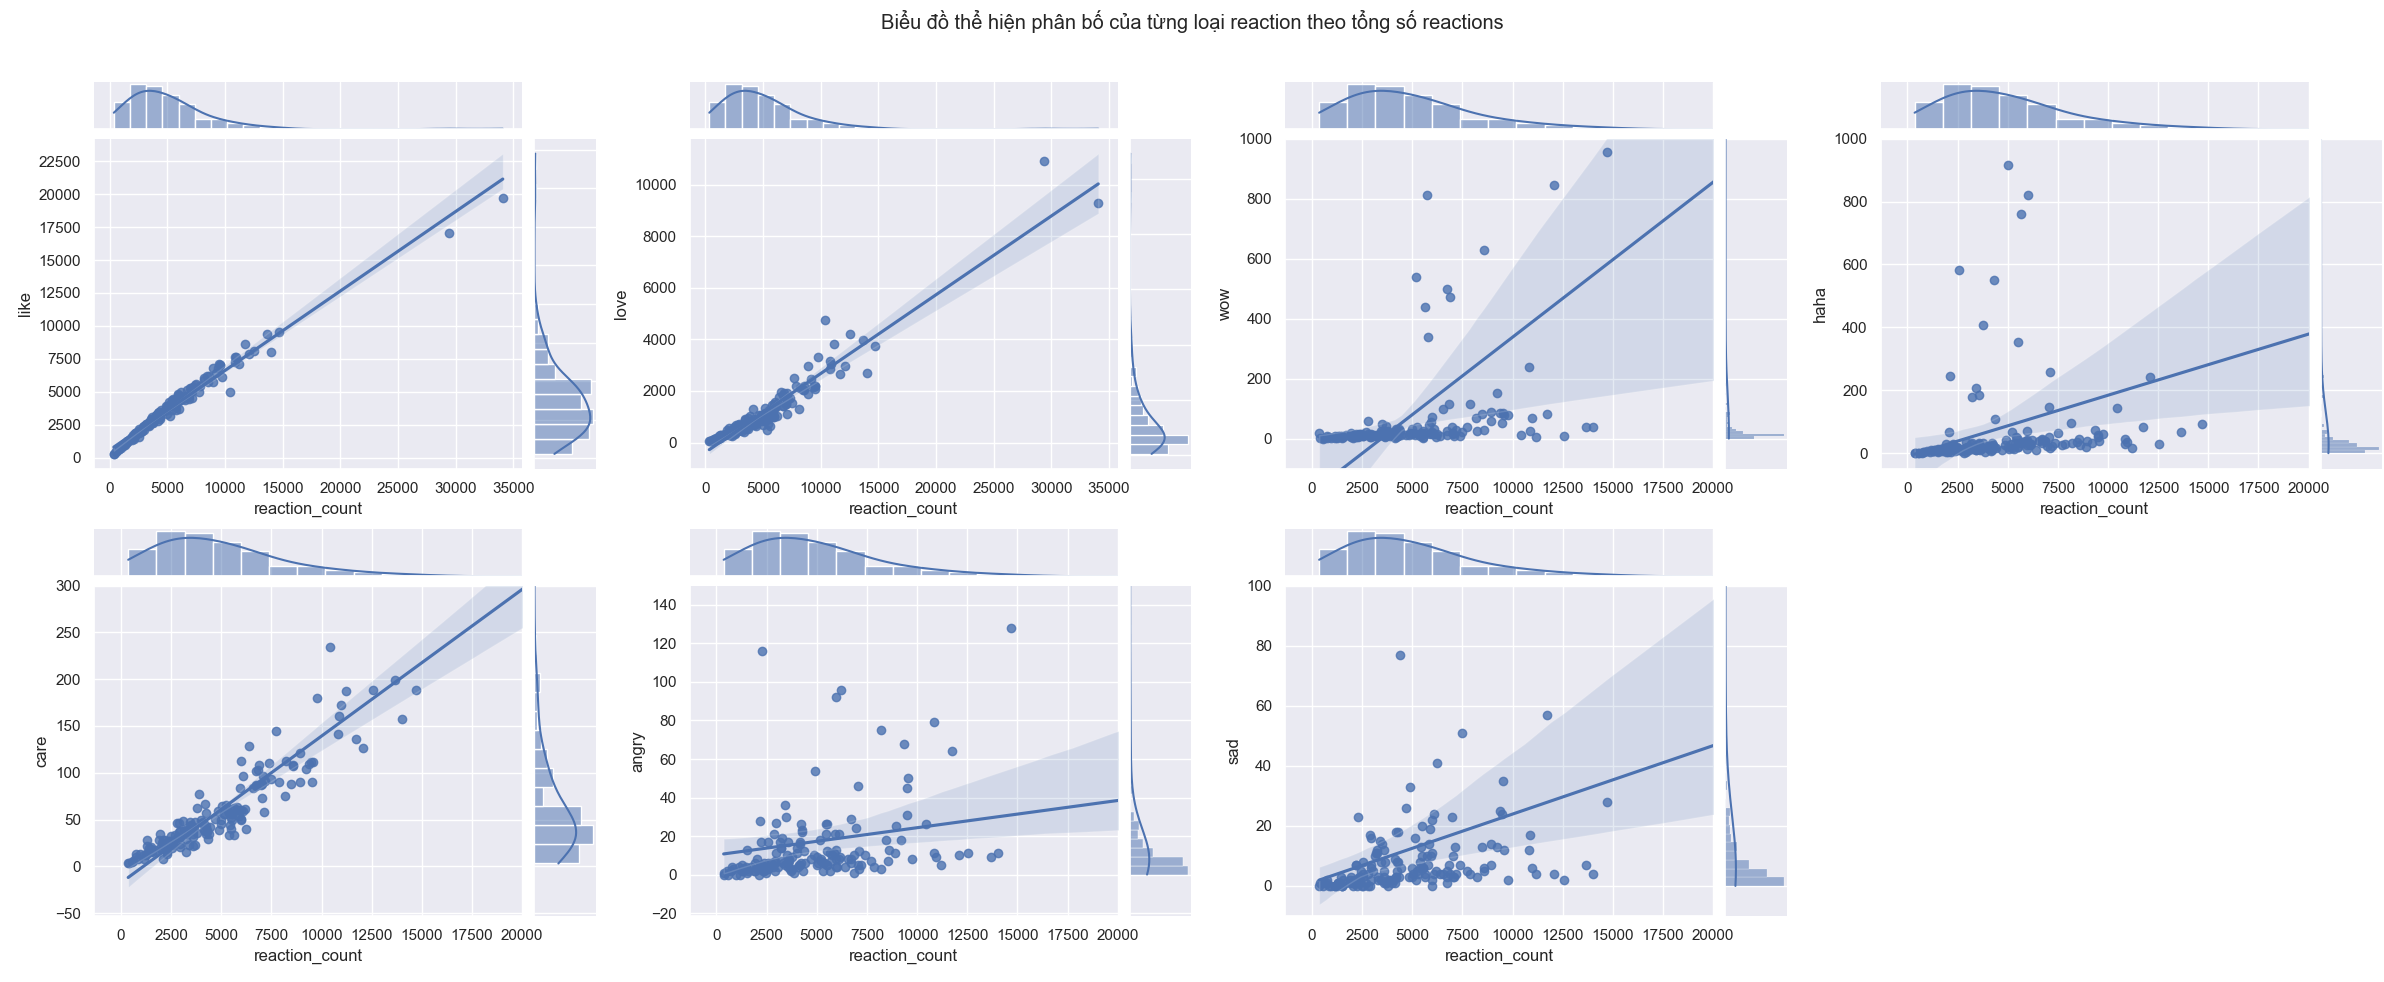

In [21]:
ax0 = sns.jointplot(data=reactions, x="reaction_count", y="like", kind="reg")

ax1 = sns.jointplot(data=reactions, x="reaction_count", y="love", kind="reg")

ax2 = sns.jointplot(data=reactions, x="reaction_count", y="wow", kind="reg")
ax2.ax_marg_x.set_xlim(None, 20000)
ax2.ax_marg_y.set_ylim(-100, 1000)

ax3 = sns.jointplot(data=reactions, x="reaction_count", y="haha", kind="reg")
ax3.ax_marg_x.set_xlim(None, 20000)
ax3.ax_marg_y.set_ylim(-50, 1000)

ax4 = sns.jointplot(data=reactions, x="reaction_count", y="care", kind="reg")
ax4.ax_marg_x.set_xlim(None, 20000)
ax4.ax_marg_y.set_ylim(None, 300)

ax5 = sns.jointplot(data=reactions, x="reaction_count", y="angry", kind="reg")
ax5.ax_marg_x.set_xlim(None, 20000)
ax5.ax_marg_y.set_ylim(None, 150)

ax6 = sns.jointplot(data=reactions, x="reaction_count", y="sad", kind="reg")
ax6.ax_marg_x.set_xlim(None, 20000)
ax6.ax_marg_y.set_ylim(-10, 100)

# ax7 = sns.lmplot(x='like', y='love', data=reactions)

fig = plt.figure(figsize=(24,10))
gs = gridspec.GridSpec(2, 4)

mg0 = sfg.SeabornFig2Grid(ax0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(ax1, fig, gs[1])
mg2 = sfg.SeabornFig2Grid(ax2, fig, gs[2])
mg3 = sfg.SeabornFig2Grid(ax3, fig, gs[3])
mg4 = sfg.SeabornFig2Grid(ax4, fig, gs[4])
mg5 = sfg.SeabornFig2Grid(ax5, fig, gs[5])
mg6 = sfg.SeabornFig2Grid(ax6, fig, gs[6])
# mg7 = sfg.SeabornFig2Grid(ax7, fig, gs[7])

gs.tight_layout(fig)
gs.update(top=0.9)
plt.suptitle("Biểu đồ thể hiện phân bố của từng loại reaction theo tổng số reactions")
plt.show()

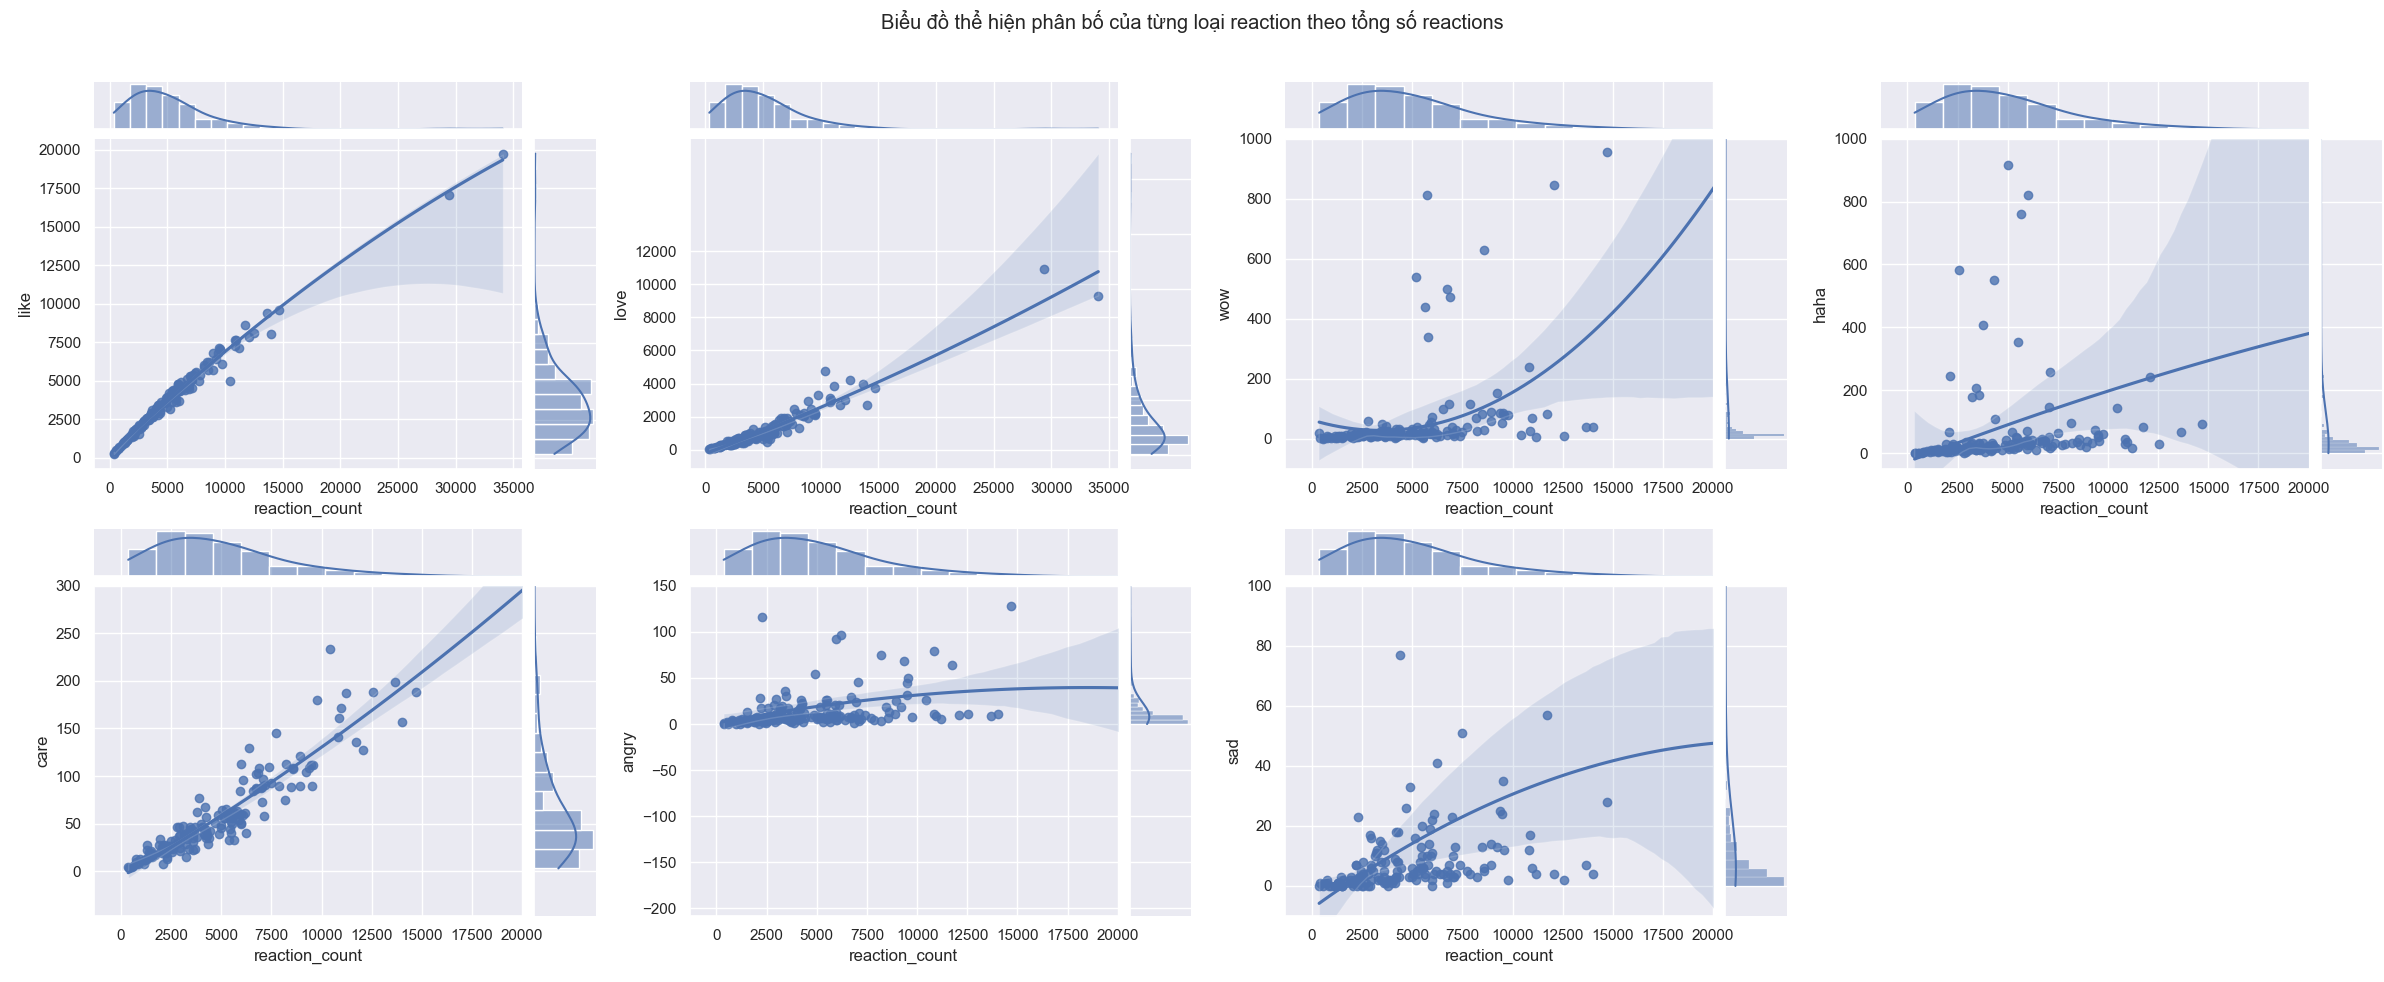

In [22]:
ax0 = sns.jointplot(data=reactions, x="reaction_count", y="like", kind="reg", order=2)

ax1 = sns.jointplot(data=reactions, x="reaction_count", y="love", kind="reg", order=2)

ax2 = sns.jointplot(data=reactions, x="reaction_count", y="wow", kind="reg", order=2)
ax2.ax_marg_x.set_xlim(None, 20000)
ax2.ax_marg_y.set_ylim(-100, 1000)

ax3 = sns.jointplot(data=reactions, x="reaction_count", y="haha", kind="reg", order=2)
ax3.ax_marg_x.set_xlim(None, 20000)
ax3.ax_marg_y.set_ylim(-50, 1000)

ax4 = sns.jointplot(data=reactions, x="reaction_count", y="care", kind="reg", order=2)
ax4.ax_marg_x.set_xlim(None, 20000)
ax4.ax_marg_y.set_ylim(None, 300)

ax5 = sns.jointplot(data=reactions, x="reaction_count", y="angry", kind="reg", order=2)
ax5.ax_marg_x.set_xlim(None, 20000)
ax5.ax_marg_y.set_ylim(None, 150)

ax6 = sns.jointplot(data=reactions, x="reaction_count", y="sad", kind="reg", order=2)
ax6.ax_marg_x.set_xlim(None, 20000)
ax6.ax_marg_y.set_ylim(-10, 100)

# ax7 = sns.lmplot(x='like', y='love', data=reactions)

fig = plt.figure(figsize=(24,10))
gs = gridspec.GridSpec(2, 4)

mg0 = sfg.SeabornFig2Grid(ax0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(ax1, fig, gs[1])
mg2 = sfg.SeabornFig2Grid(ax2, fig, gs[2])
mg3 = sfg.SeabornFig2Grid(ax3, fig, gs[3])
mg4 = sfg.SeabornFig2Grid(ax4, fig, gs[4])
mg5 = sfg.SeabornFig2Grid(ax5, fig, gs[5])
mg6 = sfg.SeabornFig2Grid(ax6, fig, gs[6])
# mg7 = sfg.SeabornFig2Grid(ax7, fig, gs[7])

gs.tight_layout(fig)
gs.update(top=0.9)
plt.suptitle("Biểu đồ thể hiện phân bố của từng loại reaction theo tổng số reactions")
plt.show()